In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [3]:
dt = pd.read_csv('heart.csv')
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


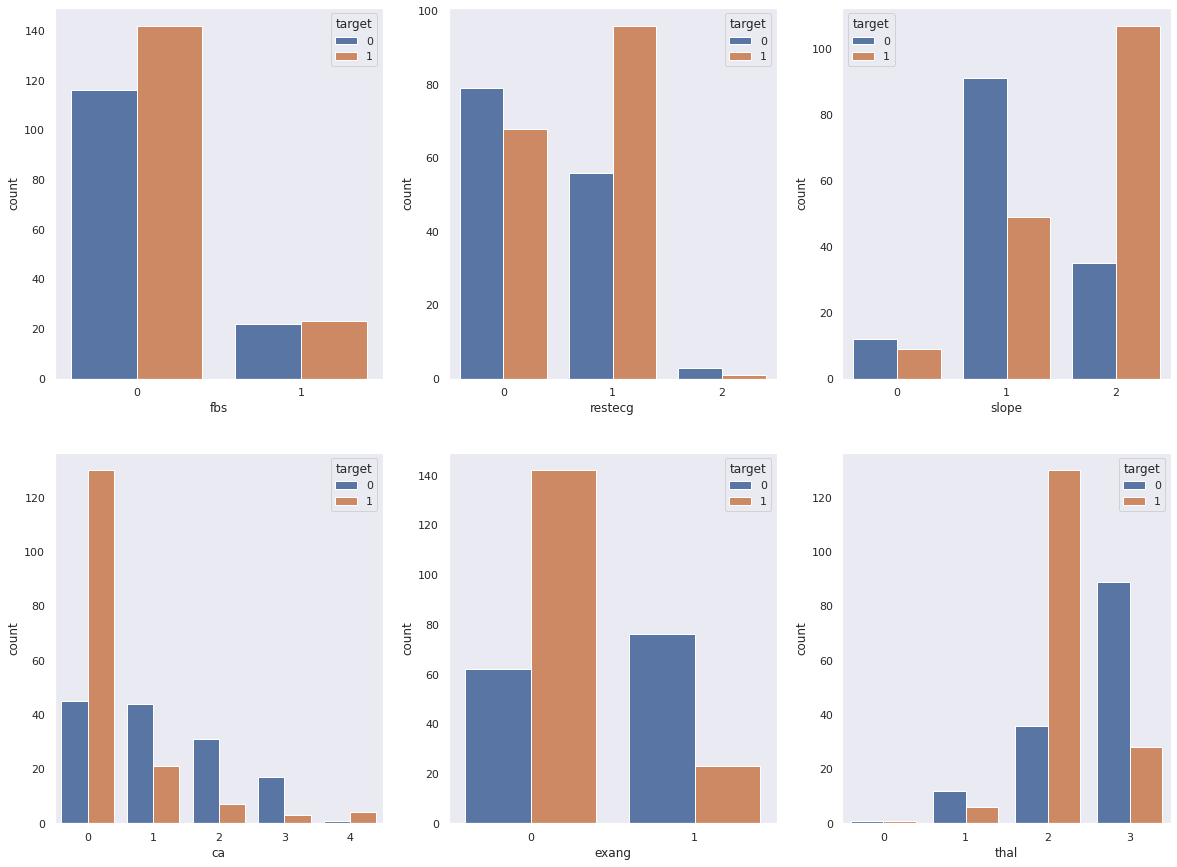

In [4]:
plt.figure(figsize=(20,15))
sns.set_theme(style='dark')
plt.subplot(2,3,1)
sns.countplot(data=dt,x='fbs',hue='target')
plt.subplot(2,3,2)
sns.countplot(data=dt,x='restecg',hue='target')
plt.subplot(2,3,3)
sns.countplot(data=dt,x='slope',hue='target')
plt.subplot(2,3,4)
sns.countplot(data=dt,x='ca',hue='target')
plt.subplot(2,3,5)
sns.countplot(data=dt,x='exang',hue='target')
plt.subplot(2,3,6)
sns.countplot(data=dt,x='thal',hue='target')
plt.show()


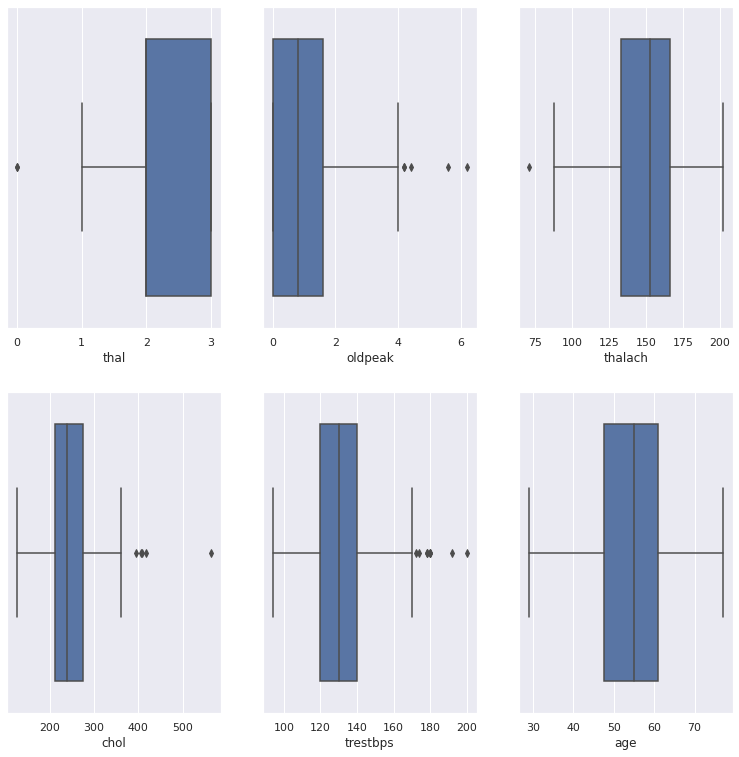

In [5]:
plt.figure(figsize=(13,13))

sns.set_theme(style='darkgrid')
plt.subplot(2,3,1)
sns.boxplot(x='thal',data=dt)
plt.subplot(2,3,2)
sns.boxplot(x='oldpeak',data=dt)
plt.subplot(2,3,3)
sns.boxplot(x='thalach',data=dt)
plt.subplot(2,3,4)
sns.boxplot(x='chol',data=dt)
plt.subplot(2,3,5)
sns.boxplot(x='trestbps',data=dt)
plt.subplot(2,3,6)
sns.boxplot(x='age',data=dt)
plt.show()

In [6]:
dt.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


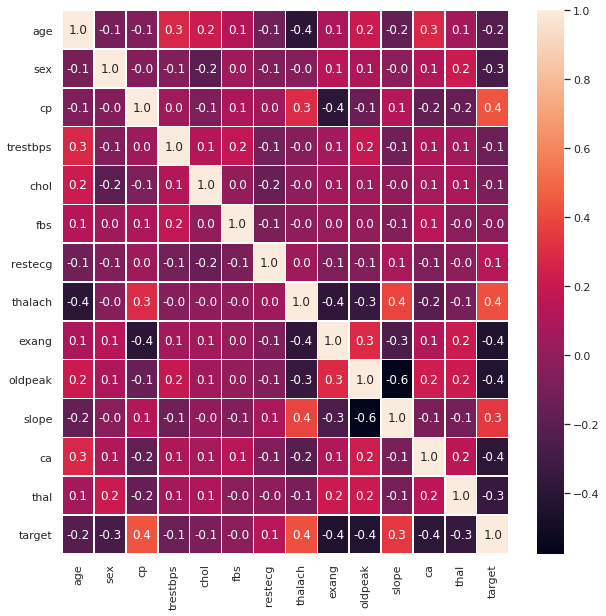

In [7]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dt.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [8]:
dt.corr()["target"].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
dt.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
dt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
pd.crosstab(dt.age,dt.target)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


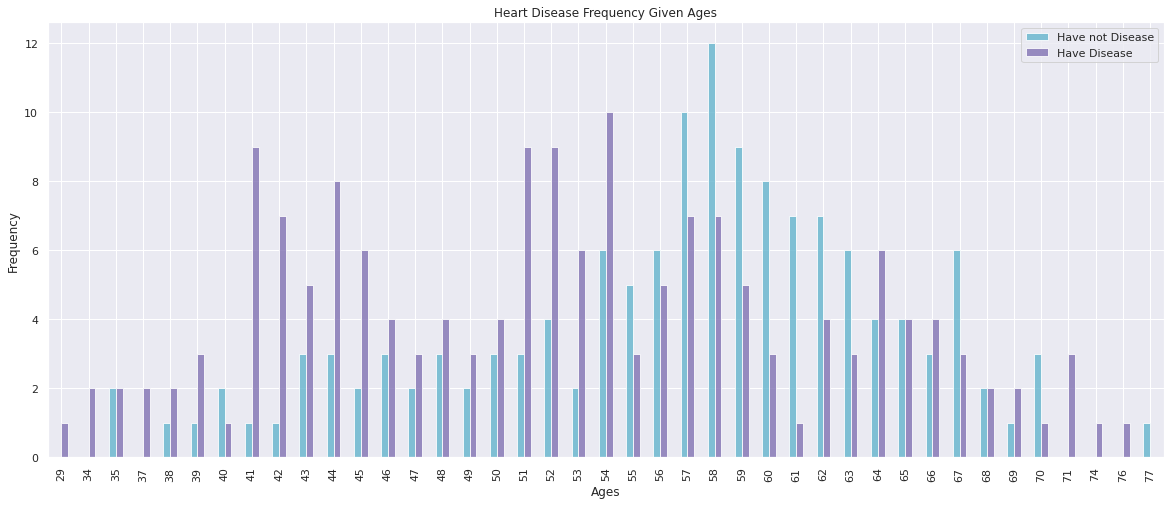

In [13]:
crosstabAge = pd.crosstab(dt.age,dt.target)
crosstabAge.plot(kind="bar",figsize=(20,8), color ="cmyk", alpha = 0.8) #alpha is opacity
plt.title('Heart Disease Frequency Given Ages')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.legend(["Have not Disease", "Have Disease"])
plt.show()

In [14]:
dt["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, ' 0 = Not Have Disease,  1 = Have Disease')

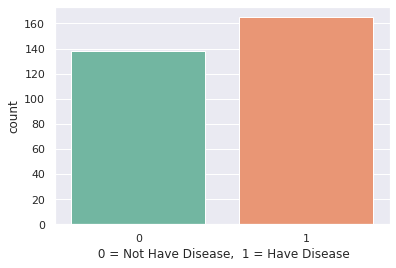

In [15]:
sns.countplot(dt["target"], palette="Set2")
plt.xlabel(' 0 = Not Have Disease,  1 = Have Disease')

In [16]:
crosstabSex = pd.crosstab(dt["sex"], dt["target"])
crosstabSex

target,0,1
sex,,
0,24,72
1,114,93


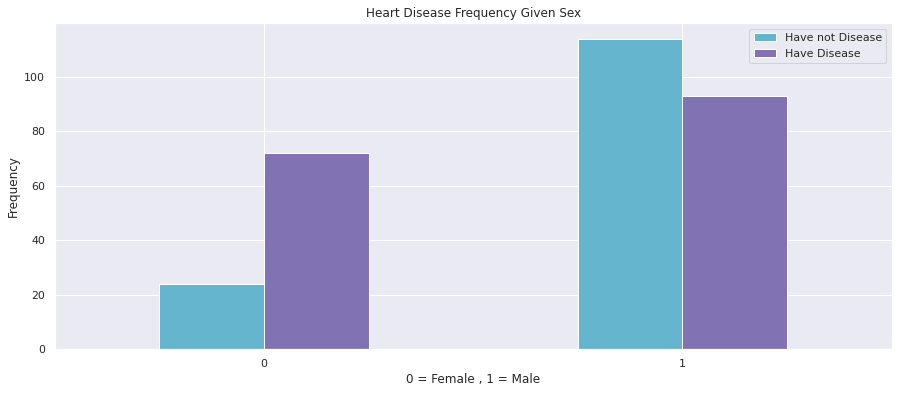

In [17]:
crosstabSex.plot(kind="bar", figsize=(15,6), color="cmyk")
plt.title("Heart Disease Frequency Given Sex")
plt.xticks(rotation=0)
plt.xlabel("0 = Female , 1 = Male")
plt.ylabel("Frequency")
plt.legend(["Have not Disease", "Have Disease"])

In [18]:
crosstabFbs = pd.crosstab(dt["fbs"], dt["target"])
crosstabFbs

target,0,1
fbs,,
0,116,142
1,22,23


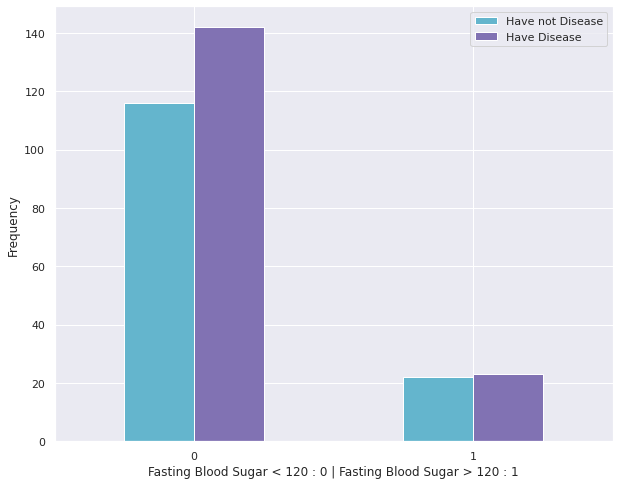

In [19]:
crosstabFbs.plot(kind="bar", figsize=(10, 8), color="cmyk")
plt.xticks(rotation=0)
plt.xlabel("Fasting Blood Sugar < 120 : 0 | Fasting Blood Sugar > 120 : 1")
plt.ylabel("Frequency")
plt.legend(["Have not Disease", "Have Disease"])

In [20]:
dt.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [21]:
crosstabExang = pd.crosstab(dt["exang"], dt["target"])
crosstabExang

target,0,1
exang,,
0,62,142
1,76,23


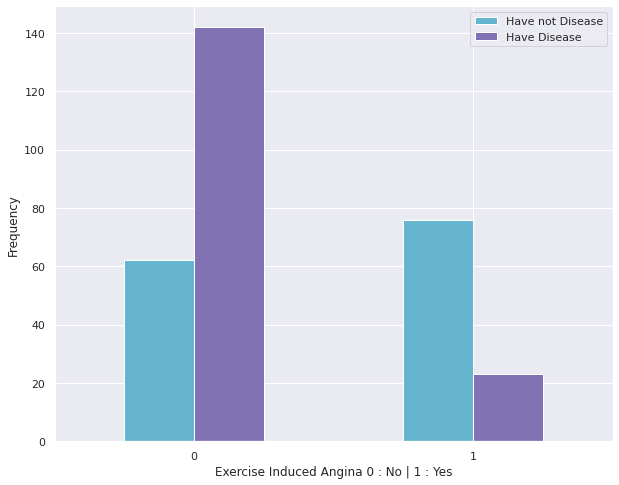

In [22]:
crosstabExang.plot(kind="bar", figsize=(10, 8), color="cmyk")
plt.xticks(rotation=0)
plt.xlabel("Exercise Induced Angina 0 : No | 1 : Yes")
plt.ylabel("Frequency")
plt.legend(["Have not Disease", "Have Disease"])

**Logical regression**

In [23]:
y = dt.target.values #values convert values onto numpy array
x_dt = dt.drop(["target"], axis=1) #except for target the other columns is our x dt

In [24]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [25]:
x = (x_dt - np.min(x_dt))/(np.max(x_dt) - np.min(x_dt)).values

In [26]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [28]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [29]:
def initialize_weights_and_bias(dimension):
    weight = np.full((dimension, 1), 0.01)
    bias = 0.0
    return weight,bias

In [30]:
np.full((10, 1), 0.01)

array([[0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01],
       [0.01]])

In [31]:
def sigmoid(z):
    y_head = 1/(1 + np.exp(-z))
    return y_head

In [32]:
def forward_backward_propagtion(weight, bias, x_train, y_train):
    # forward propagation
    z = np.dot(weight.T,x_train) + bias # z = b + w1.x1 + w2.x2 + .... + w302.x302
    y_head = sigmoid(z)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1] #x_train.shape[1] for normalization
    
    # backward propagation
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1] #simple derivative
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias} #for storage
     
    return cost,gradients


In [33]:
def update(weight, bias, x_train, y_train, learning_rate, iteration) :
    cost_list = []
    index = []
    
    # updating(learning) parameters in number_of_iterarion times
    for i in range(iteration):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagtion(weight,bias,x_train,y_train)
        # update
        weight = weight - learning_rate * gradients["Derivative Weight"]
        bias = bias - learning_rate * gradients["Derivative Bias"]
        
        cost_list.append(cost)
        index.append(i)
        print ("Cost after iteration %i: %f" %(i, cost))
        
    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,cost_list)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [34]:
def predict(weight, bias, x_test):
    # x_test is an input for forward propagation
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0)
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [35]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, iteration):
    # initialize
    dimension = x_train.shape[0]
    weight,bias = initialize_weights_and_bias(dimension)
     
    parameters, gradients = update(weight, bias,x_train, y_train, learning_rate, iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Accuracy of Model : {}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

Cost after iteration 0: 0.693132
Cost after iteration 1: 0.635737
Cost after iteration 2: 0.592984
Cost after iteration 3: 0.560639
Cost after iteration 4: 0.535680
Cost after iteration 5: 0.516018
Cost after iteration 6: 0.500211
Cost after iteration 7: 0.487263
Cost after iteration 8: 0.476473
Cost after iteration 9: 0.467343
Cost after iteration 10: 0.459510
Cost after iteration 11: 0.452710
Cost after iteration 12: 0.446743
Cost after iteration 13: 0.441459
Cost after iteration 14: 0.436741
Cost after iteration 15: 0.432496
Cost after iteration 16: 0.428654
Cost after iteration 17: 0.425156
Cost after iteration 18: 0.421955
Cost after iteration 19: 0.419012
Cost after iteration 20: 0.416296
Cost after iteration 21: 0.413779
Cost after iteration 22: 0.411439
Cost after iteration 23: 0.409257
Cost after iteration 24: 0.407217
Cost after iteration 25: 0.405305
Cost after iteration 26: 0.403509
Cost after iteration 27: 0.401817
Cost after iteration 28: 0.400222
Cost after iteration 29:

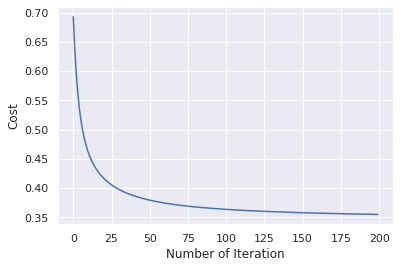

Accuracy of Model : 85.24590163934427%


In [36]:
logistic_regression(x_train,y_train,x_test,y_test,2,200)

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train.T, y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T))) #

test accuracy 0.8360655737704918


**Decision tree**

In [38]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [39]:
dt.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [40]:
ranges = [0, 120, 140, np.inf]
labels = [0, 1, 2]

dt['resting_blood_pressure'] = pd.cut(dt.resting_blood_pressure, bins=ranges, labels=labels)

In [41]:
ranges = [0, 200, 270, np.inf]
labels = [0, 1, 2]

dt['cholesterol'] = pd.cut(dt.cholesterol, bins=ranges, labels=labels)

In [42]:
ranges = [0, 130, 160, np.inf]
labels = [0, 1, 2]

dt['max_heart_rate_achieved'] = pd.cut(dt.max_heart_rate_achieved, bins=ranges, labels=labels)

In [43]:
ranges = [0, 0.8, 1.6, np.inf]
labels = [0, 1, 2]

dt['st_depression'] = pd.cut(dt.st_depression, bins=ranges, labels=labels)

In [44]:
dt['resting_blood_pressure'] = pd.to_numeric(dt.resting_blood_pressure)
dt['cholesterol'] = pd.to_numeric(dt.cholesterol)
dt['max_heart_rate_achieved'] = pd.to_numeric(dt.max_heart_rate_achieved)
dt['st_depression'] = pd.to_numeric(dt.st_depression)

In [45]:
for i in dt.columns:
    dt[i].fillna(dt[i].mean(), inplace=True)

In [46]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,2,1,1,0,1,0,2.0,0,0,1,1
1,37,1,2,1,1,0,1,2,0,2.0,0,0,2,1
2,41,0,1,1,1,0,0,2,0,1.0,2,0,2,1
3,56,1,1,0,1,0,1,2,0,0.0,2,0,2,1
4,57,0,0,0,2,0,1,2,1,0.0,2,0,2,1


In [47]:
X_train, X_test, y_train, y_test = train_test_split(dt.drop('target', 1), dt['target'], test_size = 0.3, random_state=10)

In [48]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6)
dt_model.fit(X_train, y_train)
dt_model.score(X_test, y_test)

0.7582417582417582

In [49]:
rf = RandomForestClassifier(n_estimators=300, criterion='entropy', max_depth= 3, min_samples_leaf= 5)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8021978021978022

In [50]:
y_pred = rf.predict(X_test)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        50
           1       0.73      0.90      0.80        41

    accuracy                           0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.82      0.80      0.80        91



In [53]:
X, y = dt.iloc[:,:-1], dt.iloc[:,-1]

dt_dmatrix = xgb.DMatrix(data=X,label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [54]:
clf = xgb.XGBClassifier(subsample=0.7, n_estimators= 500, learning_rate=1.0, num_boost_round=10)
clf.fit(X_train, y_train)
print('Score: ',clf.score(X_test, y_test))

Score:  0.7868852459016393
